# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [1]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%load_ext memory_profiler

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [2]:
%%capture
A, b = main.spare_matrix_Abt(50,12)

# Metoda 1:
def M_1(A,b):
    AtA, Atb = main.square_from_rectan(A,b)
    x = np.linalg.solve(AtA,Atb)
    return x
x = M_1(A,b)

norm_1 = main.residual_norm(A,x,b)
time_1 = %timeit -r 500 -n 500 -o M_1(A,b)
memory_1 = %memit -o M_1(A,b)

# Metoda 2:
def M_2(A,b):
    x = np.linalg.lstsq(A, b, rcond=None)[0]
    return x
x = M_2(A,b)

norm_2 = main.residual_norm(A,x,b)
time_2 = %timeit -r 500 -n 500 -o M_2(A,b)
memory_2 = %memit -o M_2(A,b)

# Metoda 3:
def M_3(A,b):
    Q,R = np.linalg.qr(A)
    x = sp.linalg.solve_triangular(R,Q.T @ b)
    return x
x = M_3(A,b)

norm_3 = main.residual_norm(A,x,b)
time_3 = %timeit -r 500 -n 500 -o M_3(A,b)
memory_3 = %memit -o M_3(A,b)

# Metoda 4:
def M_4(A,b):
    U,s,V = np.linalg.svd(A,full_matrices=False)
    S = np.diag(s)
    x = V.T @ sp.linalg.solve_triangular(S,U.T @ b)
    return x
x = M_4(A,b)

norm_4 = main.residual_norm(A,x,b)
time_4 = %timeit -r 500 -n 500 -o M_4(A,b)
memory_4 = %memit -o M_4(A,b)

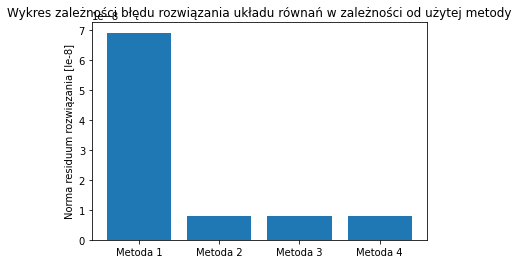

In [3]:
x_string = ['Metoda 1','Metoda 2','Metoda 3','Metoda 4']
plt.bar(x_string,[norm_1,norm_2,norm_3,norm_4])
plt.ylabel('Norma residuum rozwiązania [le-8]')
plt.title('Wykres zależności błędu rozwiązania układu równań w zależności od użytej metody')
plt.show()

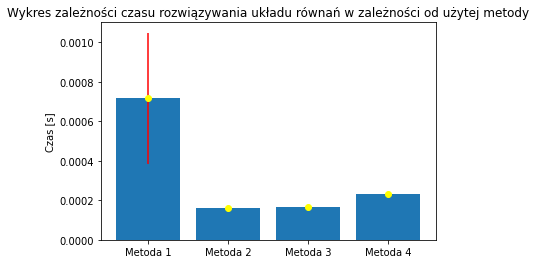

In [4]:
time = [time_1.average,time_2.average,time_3.average,time_4.average]
time_error = [time_1.stdev,time_2.stdev,time_3.stdev,time_4.stdev]
plt.bar(x_string,time)
plt.errorbar(x_string, time, yerr = time_error,fmt='o',ecolor = 'red',color='yellow')
plt.ylabel('Czas [s]')
plt.title('Wykres zależności czasu rozwiązywania układu równań w zależności od użytej metody')
plt.show()

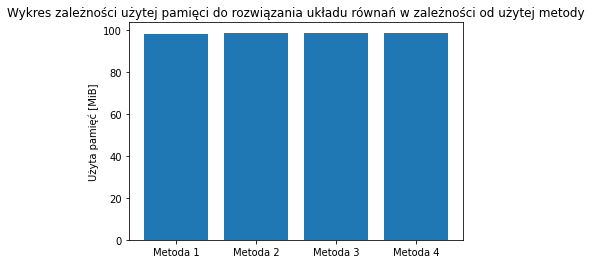

In [5]:
plt.bar(x_string,[memory_1.mem_usage[0],memory_2.mem_usage[0],memory_3.mem_usage[0],memory_4.mem_usage[0]])
plt.ylabel('Użyta pamięć [MiB]')
plt.title('Wykres zależności użytej pamięci do rozwiązania układu równań w zależności od użytej metody')
plt.show()

Jak można zaobserwować na powyższych wykresach, najgorzej z wszystkich metod rozwiązywania ukadów równań z macierzą prostokątną wypada sprowadzanie macierzy A do macierzy kwadratowej. Błąd obliczeń zdecydowanie przewyższa inne metody (około 10 razy!) oraz czas niezbędny do wyznaczenia rozwiązania jest również około 3 razy dłuższy. Metoda rozwiązywania układu za pomocą rozkładu SVD charakteryzuje się dobrą jakością rozwiązania (jedną z najlepszych) lecz czas obliczeń jest nieco dłuższy niż w wypadku najlepszych metod. Najlepiej z wszystkich testowanych metod wypada rozkład QR oraz domyślna metoda Pythona rozwiązywania układów równań liniowych z macierzą prostokątną z użyciem metody najmniejszych kwadratów. Obie metody charakteryzuje mały błąd obliczeń oraz bardzo szybki czas obliczeń. Jeśli chodzi o zużycie pamięci, wszystkie metody wypadają na bardzo podobnym poziomie.

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [6]:
x1 = np.random.normal(0,1,size = (100,1))
x2 = np.random.normal(0,1,size = (100,1))
eps = np.random.normal(0,1,size = (100,1))
y = 2 + x1 - 0.5 * x2 + eps
ones_vector = np.ones((100,1))
x1_con = np.concatenate((ones_vector,x1), axis = 1)
x2_con = np.concatenate((ones_vector,x2), axis = 1)
x12_con = np.concatenate((ones_vector,x1,x2), axis = 1)

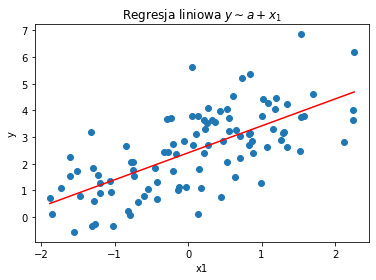

In [7]:
Q,R = np.linalg.qr(x1_con)
b,a = sp.linalg.solve_triangular(R, Q.T @ y)
x_regression = [min(x1), max(x1)]
y_regression = b + a * x_regression

plt.scatter(x1,y)
plt.plot(x_regression, y_regression,"r")
plt.title("Regresja liniowa $y\sim a+x_1$")
plt.xlabel("x1")
plt.ylabel("y")
plt.show()

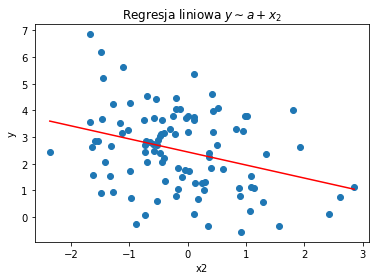

In [8]:
Q,R = np.linalg.qr(x2_con)
b,a = sp.linalg.solve_triangular(R, Q.T @ y)
x_regression = [min(x2), max(x2)]
y_regression = b + a * x_regression

plt.scatter(x2,y)
plt.plot(x_regression, y_regression,"r")
plt.title("Regresja liniowa $y\sim a+x_2$")
plt.xlabel("x2")
plt.ylabel("y")
plt.show()

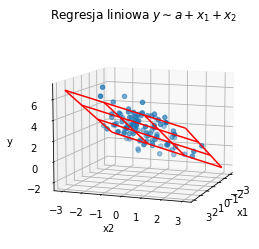

In [9]:
Q,R = np.linalg.qr(x12_con)
c,a,b = sp.linalg.solve_triangular(R, Q.T @ y)
v = np.linspace(-3,3,4)
X, Y = np.meshgrid(v,v)
Z_regression = c + a * X + b * Y

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,x2,y)
ax.plot_wireframe(X,Y,Z_regression,color = 'r')
plt.title("Regresja liniowa $y\sim a+x_1+x_2$")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.view_init(10,20)
plt.show()

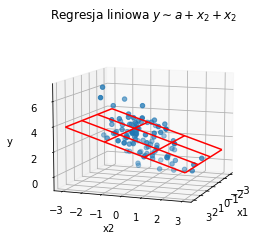

In [10]:
Q,R = np.linalg.qr(x2_con)
c,b = sp.linalg.solve_triangular(R, Q.T @ y)
v = np.linspace(-3,3,4)
X, Y = np.meshgrid(v,v)
Z_regression = c + 0 * X + b * Y

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x1,x2,y)
ax.plot_wireframe(X,Y,Z_regression,color = 'r')
plt.title("Regresja liniowa $y\sim a+x_2+x_2$")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
ax.view_init(10,20)
plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)